# Udacity Project : Wrangle and Analyze Data ( WeRateDogs Archive )

### Table of Contents

<ul>
    <li><a href='#introduction'> Introduction </a></li>
    <li><a href='#gathering'> Gathering </a></li>
    <li><a href='#assessing'> Assessing </a><ul>
    <li><a href='#visual_assessment'> Visual Assessment </a>
    <li><a href='#programmatic_assessment'> Programmatic Assessment </a></ul></li>
    <li><a href='#cleaning'> Cleaning </a><ul>
    <li><a href='#Quality'> Quality </a>
    <li><a href='#tidiness'> Tidiness </a></ul></li>
    <li><a href='#saving'> Saving </a></li>
    <li><a href='#analyzing'> Analyzing Clean Dataset </a></li>
</ul>

<a id='introduction'></a>
## Introduction

> ### Real-world data rarely comes clean. Using Python and its libraries, I will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. I will document wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries)

> ### The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10.

## Goal

> ### Wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.

In [1]:
import numpy as np
import pandas as pd
import requests
import tweepy
import json
import re
import matplotlib.pyplot as plt

pd.set_option('max_colwidth',300)

<a id='gathering'></a>
## Gathering all required data for wrangling and analyzing

### 1) Reading WeRateDogs Twitter archive

In [2]:
twitter_archive_df = pd.read_csv('twitter_archive_enhanced.csv')

In [3]:
twitter_archive_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [4]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### 2) Using Requests library to download Tweet image prediction programmatically

In [5]:
tweet_image_pred_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
tweet_image_pred_file_name = tweet_image_pred_url.split('/')[-1]
tweet_image_pred_file_name

'image-predictions.tsv'

In [6]:
try:
    #download file from url
    response = requests.get(tweet_image_pred_url)
    # save/write file in the above file name
    with open(tweet_image_pred_file_name, mode = 'wb') as file:
        file.write(response.content)
    image_predictions_df = pd.read_csv(tweet_image_pred_file_name, sep = '\t')
    
except requests.ConnectionError:
    print('Failed to establish as connection')

In [7]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3) Downloading missing tweets data using Tweepy (Twitter API)

In [8]:
# unique keys required to access an API
consumer_api_key = 'VWGAEelWpPkPAtwLZ6Y5qaT25'
consumer_api_secret_key = 'oBQwWwFcv8FXhvJf9d9ENU8nKAF5m3uywdjcoxJDw5t1syscjC'
access_token = '1232197707235651585-tGoetvEssUXEc0Jnp7RoU7KP0JgeMi'
access_token_secret = 'IZNzHvBj3MLssuAmWvj9D59y0CxCpuVvFlS4vaAdgxcHF'

In [9]:
auth = tweepy.OAuthHandler(consumer_api_key,consumer_api_secret_key)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth, parser = tweepy.parsers.JSONParser(), wait_on_rate_limit = True,wait_on_rate_limit_notify = True)

In [10]:
tweets_list = []
unavailable_tweet_id_list = []
tweet_ids = twitter_archive_df.tweet_id
for tweet_id in tweet_ids:
    try:
        tweets_list.append(api.get_status(tweet_id))
    except:
        unavailable_tweet_id_list.append(tweet_id)

Rate limit reached. Sleeping for: 739
Rate limit reached. Sleeping for: 739


In [11]:
tweets_list[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]},


In [12]:
print('Total no. of tweets info found', len(tweets_list))
print('Total no. of tweets info not found', len(unavailable_tweet_id_list))

Total no. of tweets info found 2331
Total no. of tweets info not found 25


In [13]:
# now we have a list of tweets details in form of Json in tweets_list 
# so now saving this in file called tweet_json.txt to extract data in further steps
tweet_json_file_nam = 'tweet_json.txt'
with open(tweet_json_file_nam, 'w') as file:
    file.write(json.dumps(tweets_list,indent = 4))

In [14]:
type(tweets_list[0])

dict

### 4) Saving downloaded extra tweets information in tweet_json.txt

In [8]:
extra_tweets_info_df = []
with open('tweet_json.txt', encoding='utf-8') as tweet_json_file:
    tweets_extra_info = json.load(tweet_json_file)
    for tweet_info in tweets_extra_info:
        tweet_id = tweet_info['id']
        favorite_count = tweet_info['favorite_count']
        retweet_count = tweet_info['retweet_count']
        retweeted = tweet_info['retweeted']
        
        extra_tweets_info_df.append({
            'tweet_id': int(tweet_id),
            'favorite_count': int(favorite_count),
            'retweet_count': int(retweet_count),
            'retweeted': bool(retweeted)
        })

extra_tweets_info_df = pd.DataFrame(extra_tweets_info_df,columns= ['tweet_id','favorite_count','retweet_count','retweeted'])        

In [9]:
extra_tweets_info_df.head(5)

,tweet_id,favorite_count,retweet_count,retweeted
0,892420643555336193,36076,7680,False
1,892177421306343426,31121,5681,False
2,891815181378084864,23431,3765,False
3,891689557279858688,39360,7851,False
4,891327558926688256,37595,8450,False


In [10]:
extra_tweets_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
tweet_id          2331 non-null int64
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
retweeted         2331 non-null bool
dtypes: bool(1), int64(3)
memory usage: 57.0 KB


<a id='assessing'></a>
## Assessment of the Data downloaded/gathered

### There are two type of assessment methods -

<a id='visual_assessment'></a>
### 1) Visual Assessment of three dataframes namely twitter_archive_df, image_predictions_df and extra_tweets_info_df.

In [11]:
twitter_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [12]:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [13]:
extra_tweets_info_df

,tweet_id,favorite_count,retweet_count,retweeted
0,892420643555336193,36076,7680,False
1,892177421306343426,31121,5681,False
2,891815181378084864,23431,3765,False
3,891689557279858688,39360,7851,False
4,891327558926688256,37595,8450,False
5,891087950875897856,18946,2835,False
6,890971913173991426,11011,1844,False
7,890729181411237888,60783,17137,False
8,890609185150312448,26060,3902,False
9,890240255349198849,29792,6663,False


<a id='programmatic_assessment'></a>
### 2) Programmatic Assessment

### i) twitter_archive_df

In [14]:
twitter_archive_df.shape

(2356, 17)

In [15]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
type(twitter_archive_df.timestamp[0])

str

In [17]:
twitter_archive_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
768,777621514455814149,NaN,NaN,2016-09-18 21:33:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Derek. You can't look at him and not smile. Must've just had a blue pupsicle. 12/10 would snug intensely https://t.co/BnVTMtUeI3,NaN,NaN,NaN,https://twitter.com/dog_rates/status/777621514455814149/photo/1,12,10,Derek,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
1029,745712589599014916,NaN,NaN,2016-06-22 20:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Percy. He fell asleep at the wheel. Irresponsible af. 7/10 absolute menace on the roadway https://t.co/QHbvtvaw8E,NaN,NaN,NaN,https://twitter.com/dog_rates/status/745712589599014916/photo/1,7,10,Percy,None,None,None,None
1050,743210557239623680,NaN,NaN,2016-06-15 22:36:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Kayla, an underground poker legend. Players lose on purpose hoping she'll let them pet her. 10/10 strategic af https://t.co/EkLku795aO",NaN,NaN,NaN,https://twitter.com/dog_rates/status/743210557239623680/photo/1,10,10,Kayla,None,None,None,None
740,780543529827336192,NaN,NaN,2016-09-26 23:04:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a perturbed super floof. 12/10 would snug so damn well https://t.co/VG095mi09Q,NaN,NaN,NaN,https://twitter.com/dog_rates/status/780543529827336192/photo/1,12,10,None,None,None,None,None
380,827600520311402496,NaN,NaN,2017-02-03 19:31:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Tucker. It's his birthday. He's pupset with you because you're too busy playing @GoodDogsGame to celebrate. 13/10 would put down phone https://t.co/vrppizPGdb,NaN,NaN,NaN,https://twitter.com/dog_rates/status/827600520311402496/photo/1,13,10,Tucker,None,None,None,None
2229,668248472370458624,NaN,NaN,2015-11-22 02:03:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Bisquick. He is a Brown Douglass Fir terrier. Very inbred. Looks terrified. 8/10 still cute tho https://t.co/1XYRh8N00K,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668248472370458624/photo/1,8,10,Bisquick,None,None,None,None
945,752660715232722944,NaN,NaN,2016-07-12 00:27:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Hooman used Pokeball\n*wiggle*\n*wiggle*\nDoggo broke free \n10/10 https://t.co/bWSgqnwSHr,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/752660715232722944/photo/1,https://twitter.com/dog_rates/status/752660715232722944/photo/1",10,10,None,doggo,None,None,None
2315,666691418707132416,NaN,NaN,2015-11-17 18:56:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Christoper. He is a spotted Penne. Can easily navigate stairs. 8/10 https://t.co/bg4TqvvkuF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666691418707132416/photo/1,8,10,Christoper,None,None,None,None
1732,679828447187857408,NaN,NaN,2015-12-24 00:58:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Everybody look at this beautiful pupper 13/10 https://t.co/hyAC5Hq9GC,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/679828447187857408/photo/1,https://twitter.com/dog_rates/status/679

In [18]:
# checking if a dog has been designated more than one dog stages
dog_stages_check1 = twitter_archive_df.query('((doggo=="doggo") & (floofer == "floofer")) | ((doggo=="doggo") & (pupper == "pupper")) | ((doggo=="doggo") & (puppo == "puppo")) | ((floofer=="floofer") & (puppo == "puppo")) | ((floofer=="floofer") & (pupper == "pupper")) | ((puppo=="puppo") & (pupper == "pupper")) | ((doggo=="doggo") & (floofer == "floofer") & (puppo=="puppo") & (pupper == "pupper"))')
dog_stages_check1
#Set these to null as they contain single dogs but double dog stages hence is not clear 956,191,200,460,575,705 - Doggo
# tweets with two dogs hence two stages 531,565,733,778,822,889,1063,1113

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,"https://twitter.com/dog_rates/status/733109485275860992/photo/1,https://twitter.com/dog_rates/status/733109485275860992/photo/1",12,10,None,doggo,None,pupper,None
822,770093767776997377

In [19]:
twitter_archive_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [20]:
twitter_archive_df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [21]:
twitter_archive_df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [22]:
twitter_archive_df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [23]:
twitter_archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [24]:
twitter_archive_df.tweet_id.nunique()

2356

In [25]:
twitter_archive_df.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Tucker        10
Lola          10
Penny         10
Bo             9
Winston        9
the            8
Sadie          8
Buddy          7
Toby           7
an             7
Daisy          7
Bailey         7
Oscar          6
Rusty          6
Jax            6
Dave           6
Scout          6
Jack           6
Koda           6
Stanley        6
Leo            6
Milo           6
Bella          6
Bentley        5
            ... 
Smiley         1
Charl          1
Maude          1
Jed            1
Saydee         1
Bayley         1
Karma          1
Steve          1
Jim            1
Dante          1
Pavlov         1
Sweet          1
Vince          1
Scruffers      1
Deacon         1
Lilah          1
Zoe            1
Brady          1
Bodie          1
Binky          1
Genevieve      1
Rey            1
Darrel         1
Cheryl         1
Fwed           1
Sage           1
Bobble         1
Lolo          

In [26]:
twitter_archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [27]:
twitter_archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [28]:
twitter_archive_df.query("rating_numerator == 9").text.sample(5)

1431                                                                                   Say hello to Pherb. He does parkour. 9/10 https://t.co/LHFfUyLBZT
1394        This is Thumas. He covered himself in nanners for maximum camouflage. It didn't work. I can still see u Thumas. 9/10 https://t.co/x0ZDlNqfb1
1773        This is Jessifer. She is a Bismoth Teriyaki. Flowers being attacked by hurricanes on bandana (rad). 9/10 stellar pup https://t.co/nZhmRwZzWv
1421    Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https://t.co/GPaoH5qWEk
1709                         This is Brody. That is his chair. He loves his chair. Never leaves it. 9/10 might be stuck actually https://t.co/WvJRg0XJit
Name: text, dtype: object

In [29]:
twitter_archive_df.query("rating_numerator == 8").text.sample(5)

1958                                           When you ask your professor about extra credit on the last day of class. 8/10 https://t.co/H6rqZyE4NP
2029                           Remarkable dog here. Walks on back legs really well. Looks extra soft. 8/10 would cuddle with https://t.co/gpWLdbposg
2069    Say hello to Clarence. He's a western Alkaline Pita. Very proud of himself for dismembering his stuffed dog pal 8/10 https://t.co/BHxr9O7wJY
1745       I know everyone's excited for Christmas but that doesn't mean you can send in reindeer. We only rate dogs... 8/10 https://t.co/eWjWgbOCYL
2008     Mighty rare dogs here. Long smooth necks. Great knees. Travel in squads. 1 out of every 14 is massive. 8/10 for all https://t.co/PoMKKnKpRd
Name: text, dtype: object

In [30]:
twitter_archive_df.query("rating_numerator == 420").text

188     @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
2074       After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY
Name: text, dtype: object

In [31]:
twitter_archive_df.query("rating_denominator == 11").text

784     RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
1068    After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
1662     This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
Name: text, dtype: object

In [32]:
twitter_archive_df.query("rating_denominator == 50").text

1202                                 This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
1274    From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK
1351                                                                    Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa
Name: text, dtype: object

In [33]:
twitter_archive_df.query("rating_denominator == 80").text

1254    Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
1843     Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw
Name: text, dtype: object

In [34]:
twitter_archive_df.query("rating_denominator == 20").text

1165                                                                            Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
1598    Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating
Name: text, dtype: object

In [35]:
twitter_archive_df.query("rating_denominator == 110").text

1635    Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55
Name: text, dtype: object

In [36]:
twitter_archive_df.query("rating_denominator == 150").text

902    Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
Name: text, dtype: object

### ii) image_predictions_df

In [37]:
image_predictions_df.shape

(2075, 12)

In [38]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [39]:
image_predictions_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
874,698178924120031232,https://pbs.twimg.com/media/CbBuBhbWwAEGH29.jpg,1,Chesapeake_Bay_retriever,0.351868,True,malinois,0.207753,True,Labrador_retriever,0.154606,True
358,672614745925664768,https://pbs.twimg.com/media/CVWbitUW4AAzclx.jpg,1,starfish,0.712717,False,goldfish,0.258865,False,sea_cucumber,0.002015,False
938,703631701117943808,https://pbs.twimg.com/media/CcPNS4yW8AAd-Et.jpg,2,window_shade,0.909533,False,window_screen,0.011427,False,brass,0.008882,False
274,670833812859932673,https://pbs.twimg.com/media/CU9HyzSWIAAVcte.jpg,1,Pekinese,0.609853,True,Persian_cat,0.265442,False,Japanese_spaniel,0.027460,True
620,680473011644985345,https://pbs.twimg.com/media/CXGGlzvWYAArPfk.jpg,1,Lakeland_terrier,0.796694,True,West_Highland_white_terrier,0.138709,True,Norwich_terrier,0.016253,True
79,667453023279554560,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,1,Labrador_retriever,0.825670,True,French_bulldog,0.056639,True,Staffordshire_bullterrier,0.054018,True
1464,778408200802557953,https://pbs.twimg.com/media/Cs12ICuWAAECNRy.jpg,3,Pembroke,0.848362,True,Cardigan,0.108124,True,beagle,0.011942,True
941,704054845121142784,https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg,1,Great_Pyrenees,0.667939,True,kuvasz,0.228764,True,golden_retriever,0.043885,True
740,687312378585812992,https://pbs.twimg.com/media/CYnS9VWW8AAeR8m.jpg,1,seat_belt,0.703561,False,Great_Dane,0.139909,True,Weimaraner,0.021112,True
495,675740360753160193,https://pbs.twimg.com/ext_tw_video_thumb/675740268751138818/pu/img/dVaVeFAVT-lk_1ZV.jpg,1,golden_retriever,0.800495,True,kuvasz,0.097756,True,Saluki,0.068415,True


In [40]:
image_predictions_df.tweet_id.nunique()

2075

In [41]:
image_predictions_df.query("p1_dog == True").p1.value_counts()

golden_retriever               150
Labrador_retriever             100
Pembroke                        89
Chihuahua                       83
pug                             57
chow                            44
Samoyed                         43
toy_poodle                      39
Pomeranian                      38
malamute                        30
cocker_spaniel                  30
French_bulldog                  26
Chesapeake_Bay_retriever        23
miniature_pinscher              23
German_shepherd                 20
Staffordshire_bullterrier       20
Siberian_husky                  20
Cardigan                        19
beagle                          18
Shetland_sheepdog               18
Maltese_dog                     18
Eskimo_dog                      18
Shih-Tzu                        17
Lakeland_terrier                17
Rottweiler                      17
Italian_greyhound               16
kuvasz                          16
West_Highland_white_terrier     14
Great_Pyrenees      

In [42]:
image_predictions_df.query("p2_dog == True").p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
collie                             27
Pembroke                           27
Eskimo_dog                         27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
toy_terrier                        20
miniature_pinscher                 20
malinois                           20
Samoyed                            20
chow                               20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [43]:
image_predictions_df.query("p3_dog == True").p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
beagle                            31
cocker_spaniel                    31
toy_poodle                        29
Pomeranian                        29
Pekinese                          29
Great_Pyrenees                    27
Pembroke                          27
Chesapeake_Bay_retriever          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
L

### iii) extra_tweets_info_df

In [44]:
extra_tweets_info_df.shape

(2331, 4)

In [45]:
extra_tweets_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
tweet_id          2331 non-null int64
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
retweeted         2331 non-null bool
dtypes: bool(1), int64(3)
memory usage: 57.0 KB


In [46]:
extra_tweets_info_df.sample(10)

,tweet_id,favorite_count,retweet_count,retweeted
340,831262627380748289,11940,2057,False
615,793845145112371200,9379,1907,False
1421,696518437233913856,3879,1700,False
1255,708845821941387268,2955,893,False
297,835297930240217089,16468,3011,False
1217,712065007010385924,2245,613,False
1630,683449695444799489,3865,1596,False
135,864873206498414592,30699,8130,False
1032,742161199639494656,4316,1360,False
1791,676606785097199616,1850,422,False


In [47]:
extra_tweets_info_df.tweet_id.nunique()

2331

### Finding no. of retweeted tweets as those have to be dropped

In [48]:
extra_tweets_info_df.retweeted.value_counts()

False    2331
Name: retweeted, dtype: int64

This means all the tweets whose extra info is available are orignal

<a id='cleaning'></a>
## Cleaning the dataset

### Quality (Eight quality issues with dataset to be fixed)

#### twitter_archive_df

#### i) Dropping extra columns which in no way will affect or will be used in our analysis

#### ii) While assessing some different numerator and denominator I noticed in some tweets reference to 9/11 was there or some other similar type of similar format and that is being showed as score in the dataframe so that has to been changed.

#### iii) Dog names are not properly provided for example names are  a, an etc. so lowercase names have to be looked into and some not available names are written as None which is being recognised as a name and not null

#### iv) Extracting just the source from text in source column and removing html links from it

#### v) Drop Retweeted Tweet rows

#### vi) Drop tweets for which image prediction is not available

#### vii) Convert timestamp column values from string to datetime 

#### image_predictions_df

#### extra_tweets_info_df (drop retweeted column as it has same value for all the entries ie. False)

### Tidiness (There are three points to keep in mind to make our dataset tidy they are as follows)

#### i) Each variable is a column (In twitter_archive_df we have to convert doggo, floofer, etc columns to a single column called dog type as those are observations and in image_prediction_df we can handle dog breed using two columns ie. breed_type and prediction_confidence)

#### ii) Each is a observation row

#### iii) Each observational unit is a table (All the three tables have to be merged as they are a single observational unit)

In [49]:
# creating copies of df for cleaning data and keeping orignal data intact in the process
twitter_archive_df_copy = twitter_archive_df.copy()
image_predictions_df_copy = image_predictions_df.copy()
extra_tweets_info_df_copy = extra_tweets_info_df.copy()

<a id='quality'></a>
## Quality 

### 1) Define

#### Convert timestamp and retweeted_status_timestamp from string to datetime format

### 1) Code

In [50]:
twitter_archive_df_copy.timestamp = pd.to_datetime(twitter_archive_df_copy.timestamp)
twitter_archive_df_copy.retweeted_status_timestamp = pd.to_datetime(twitter_archive_df_copy.retweeted_status_timestamp)

### 1) Test

In [51]:
type(twitter_archive_df_copy.timestamp[0])

pandas._libs.tslibs.timestamps.Timestamp

In [52]:
type(twitter_archive_df_copy.retweeted_status_timestamp[603])

pandas._libs.tslibs.timestamps.Timestamp

### 2) Define

#### Extracting source from text in source column removing html tags in twitter_archive_df_copy

### 2) Code

In [53]:
split_source_helper = twitter_archive_df_copy.source.str.split('>',expand= True)
twitter_archive_df_copy.source = split_source_helper[1].str[:-3]

### 2) Test

In [54]:
twitter_archive_df_copy.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### 3) Define

#### Change dog stages from 'None' which is a string to None and handle dog which are assigned more than one stage

### 3) Code

In [55]:
#first setting stages to None
twitter_archive_df_copy.loc[twitter_archive_df_copy.doggo == 'None', 'doggo'] = None
twitter_archive_df_copy.loc[twitter_archive_df_copy.floofer == 'None', 'floofer'] = None
twitter_archive_df_copy.loc[twitter_archive_df_copy.pupper == 'None', 'pupper'] = None
twitter_archive_df_copy.loc[twitter_archive_df_copy.puppo == 'None', 'puppo'] = None
#second set multiple dogs stages if in a same row to none if tweet has single dog but two stages
#Set these to null as they contain single dogs but double dog stages hence is not clear 956,191,200,460,575,705 - Doggo
twitter_archive_df_copy.iloc[191,-4] = None
twitter_archive_df_copy.iloc[200,-4] = None
twitter_archive_df_copy.iloc[460,-4] = None
twitter_archive_df_copy.iloc[575,-4] = None
twitter_archive_df_copy.iloc[705,-2] = None
# in 956 all stages have to be set to none as tweet says those are not the stages of the dog
twitter_archive_df_copy.iloc[956,-4:] = None
# rest of the multiple stages tweets have more than one dog in the tweet hence in a single columns both stages will be saved seperated with /
# tweet-id 531,565,778,822,889,1063,1113 with more than one dog and more than one stage
twitter_archive_df_copy.iloc[531,-4]= 'doggo/pupper'
twitter_archive_df_copy.iloc[531,-2]= None

twitter_archive_df_copy.iloc[565,-4]= 'doggo/pupper'
twitter_archive_df_copy.iloc[565,-2]= None

twitter_archive_df_copy.iloc[733,-4]= 'doggo/pupper'
twitter_archive_df_copy.iloc[733,-2]= None

twitter_archive_df_copy.iloc[778,-4]= 'doggo/pupper'
twitter_archive_df_copy.iloc[778,-2]= None

twitter_archive_df_copy.iloc[822,-4]= 'doggo/pupper'
twitter_archive_df_copy.iloc[822,-2]= None

twitter_archive_df_copy.iloc[889,-4]= 'doggo/pupper'
twitter_archive_df_copy.iloc[889,-2]= None

twitter_archive_df_copy.iloc[1063,-4]= 'doggo/pupper'
twitter_archive_df_copy.iloc[1063,-2]= None

twitter_archive_df_copy.iloc[1113,-4]= 'doggo/pupper'
twitter_archive_df_copy.iloc[1113,-2]= None

### 3) Test

In [56]:
twitter_archive_df_copy.iloc[531,-4:]

doggo      doggo/pupper
floofer            None
pupper             None
puppo              None
Name: 531, dtype: object

In [57]:
twitter_archive_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         92 non-null object
floofer                       10 non-null object
pupper                        247 non-null object
puppo                         30 non-null object
dtypes: datetime64[ns](

### 4) Define

#### Extracting score from the tweets using regex

### 4) Code

In [58]:
# extracting score from the tweet text
score_extract_helper = twitter_archive_df_copy.text.str.findall(r'(\d*[.]?\d+/\d*)')
score_extract_helper = score_extract_helper.tolist()
score_extract_helper

[['13/10'],
 ['13/10'],
 ['12/10'],
 ['13/10'],
 ['12/10'],
 ['13/10'],
 ['13/10'],
 ['13/10'],
 ['13/10'],
 ['14/10'],
 ['13/10'],
 ['13/10'],
 ['13/10'],
 ['12/10'],
 ['13/10'],
 ['13/10'],
 ['12/10'],
 ['13/10'],
 ['13/10'],
 ['13/10'],
 ['12/10'],
 ['13/10'],
 ['14/10'],
 ['13/10'],
 ['13/10'],
 ['12/10'],
 ['13/10'],
 ['13/10'],
 ['13/10'],
 ['12/10'],
 ['12/10'],
 ['13/10'],
 ['12/10'],
 ['12/10'],
 ['13/10'],
 ['14/10'],
 ['13/10'],
 ['13/10'],
 ['12/10'],
 ['13/10'],
 ['13/10'],
 ['14/10'],
 ['13/10'],
 ['12/10'],
 ['12/10'],
 ['13.5/10'],
 ['13/10'],
 ['13/10'],
 ['13/10'],
 ['12/10'],
 ['13/10'],
 ['13/10'],
 ['13/10'],
 ['12/10'],
 ['13/10'],
 ['17/10', '13/10'],
 ['14/10'],
 ['12/10'],
 ['13/10'],
 ['12/10'],
 ['12/10'],
 ['12/10'],
 ['11/10'],
 ['13/10'],
 ['14/10'],
 ['12/10'],
 ['13/10'],
 ['12/10'],
 ['14/10'],
 ['11/10'],
 ['13/10'],
 ['13/10'],
 ['13/10'],
 ['13/10'],
 ['11/10'],
 ['13/10'],
 ['14/10'],
 ['13/10'],
 ['14/10'],
 ['12/10'],
 ['13/10'],
 ['12/10'],
 ['12

In [59]:
# extracting numertor and denominator
correct_score_list = []
length_score_extract_helper = len(score_extract_helper)
for score in range(length_score_extract_helper):
    if len(score_extract_helper[score]) <= 1:
        correct_score_list.append(score_extract_helper[score][0])
    elif len(score_extract_helper[score]) > 1:
        flag = False
        for indi_score in range(len(score_extract_helper[score])):
            helper_split = score_extract_helper[score][indi_score].split('/')
            if(helper_split[1] == '10' and flag != True):
                flag=True
                correct_score_list.append(score_extract_helper[score][indi_score])
        if(flag != True):
            correct_score_list.append(score_extract_helper[score][0])

In [60]:
len(correct_score_list)

2356

In [61]:
np.unique(correct_score_list)

array(['.10/10', '.11/10', '.12/10', '.13/10', '.8/10', '.9/10', '0/10',
       '007/10', '1/10', '10/10', '11.26/10', '11.27/10', '11/10', '11/15',
       '12/10', '121/110', '13.5/10', '13/10', '14/10', '143/130',
       '144/120', '15/10', '165/150', '17/10', '1776/10', '182/10', '2/10',
       '20/16', '204/170', '24/7', '3/10', '4/10', '4/20', '420/10',
       '44/40', '45/50', '5/10', '6/10', '60/50', '666/10', '7/10', '8/10',
       '80/80', '84/70', '88/80', '9.5/10', '9.75/10', '9/10', '99/90'], 
      dtype='<U8')

In [62]:
# seperating numerator and denominator of score
score_numerator = []
score_denominator = []
for i in range(len(correct_score_list)):
    correct_score_split = correct_score_list[i].split('/')
    score_numerator.append(correct_score_split[0])
    score_denominator.append(correct_score_split[1])

In [63]:
for i in range(len(score_numerator)):
    if score_numerator[i][0] == '.':
        score_numerator[i]=score_numerator[i][1:]

In [64]:
np.unique(score_numerator)

array(['0', '007', '1', '10', '11', '11.26', '11.27', '12', '121', '13',
       '13.5', '14', '143', '144', '15', '165', '17', '1776', '182', '2',
       '20', '204', '24', '3', '4', '420', '44', '45', '5', '6', '60',
       '666', '7', '8', '80', '84', '88', '9', '9.5', '9.75', '99'], 
      dtype='<U5')

In [65]:
#converting from string to float
score_numerator = [float(score) for score in score_numerator]
score_numerator

[13.0,
 13.0,
 12.0,
 13.0,
 12.0,
 13.0,
 13.0,
 13.0,
 13.0,
 14.0,
 13.0,
 13.0,
 13.0,
 12.0,
 13.0,
 13.0,
 12.0,
 13.0,
 13.0,
 13.0,
 12.0,
 13.0,
 14.0,
 13.0,
 13.0,
 12.0,
 13.0,
 13.0,
 13.0,
 12.0,
 12.0,
 13.0,
 12.0,
 12.0,
 13.0,
 14.0,
 13.0,
 13.0,
 12.0,
 13.0,
 13.0,
 14.0,
 13.0,
 12.0,
 12.0,
 13.5,
 13.0,
 13.0,
 13.0,
 12.0,
 13.0,
 13.0,
 13.0,
 12.0,
 13.0,
 17.0,
 14.0,
 12.0,
 13.0,
 12.0,
 12.0,
 12.0,
 11.0,
 13.0,
 14.0,
 12.0,
 13.0,
 12.0,
 14.0,
 11.0,
 13.0,
 13.0,
 13.0,
 13.0,
 11.0,
 13.0,
 14.0,
 13.0,
 14.0,
 12.0,
 13.0,
 12.0,
 12.0,
 14.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 12.0,
 12.0,
 12.0,
 13.0,
 12.0,
 13.0,
 14.0,
 13.0,
 12.0,
 12.0,
 12.0,
 13.0,
 14.0,
 13.0,
 12.0,
 13.0,
 12.0,
 13.0,
 12.0,
 12.0,
 12.0,
 14.0,
 13.0,
 11.0,
 10.0,
 13.0,
 13.0,
 13.0,
 14.0,
 12.0,
 13.0,
 13.0,
 12.0,
 13.0,
 14.0,
 12.0,
 13.0,
 12.0,
 12.0,
 13.0,
 12.0,
 13.0,
 13.0,
 13.0,
 13.0,
 12.0,
 13.0,
 12.0,
 12.0,
 13.0,
 13.0,
 13.0,
 14.0,
 12.0,

In [66]:
np.unique(score_numerator)

array([  0.00000000e+00,   1.00000000e+00,   2.00000000e+00,
         3.00000000e+00,   4.00000000e+00,   5.00000000e+00,
         6.00000000e+00,   7.00000000e+00,   8.00000000e+00,
         9.00000000e+00,   9.50000000e+00,   9.75000000e+00,
         1.00000000e+01,   1.10000000e+01,   1.12600000e+01,
         1.12700000e+01,   1.20000000e+01,   1.30000000e+01,
         1.35000000e+01,   1.40000000e+01,   1.50000000e+01,
         1.70000000e+01,   2.00000000e+01,   2.40000000e+01,
         4.40000000e+01,   4.50000000e+01,   6.00000000e+01,
         8.00000000e+01,   8.40000000e+01,   8.80000000e+01,
         9.90000000e+01,   1.21000000e+02,   1.43000000e+02,
         1.44000000e+02,   1.65000000e+02,   1.82000000e+02,
         2.04000000e+02,   4.20000000e+02,   6.66000000e+02,
         1.77600000e+03])

In [67]:
#converting from string to float
score_denominator = [float(score) for score in score_denominator]
score_denominator

[10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,

In [68]:
twitter_archive_df_copy.rating_numerator = pd.Series(score_numerator)
twitter_archive_df_copy.rating_denominator = pd.Series(score_denominator)

### 4) Test

In [69]:
twitter_archive_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          2356 non-null object
doggo                         92 non-null object
floofer                       10 non-null object
pupper                        247 non-null object
puppo                         30 non-null object
dtypes: datetime64[

In [70]:
twitter_archive_df_copy[['rating_numerator','rating_denominator']]

,rating_numerator,rating_denominator
0,13.0,10.0
1,13.0,10.0
2,12.0,10.0
3,13.0,10.0
4,12.0,10.0
5,13.0,10.0
6,13.0,10.0
7,13.0,10.0
8,13.0,10.0
9,14.0,10.0


### 5) Define

#### Dog names in lowercases are not real hence have to be changed to None

### 5) Code

In [71]:
#replacing all lowercase name for ex. a, an, etc. to None
twitter_archive_df_copy_nam_lower =  twitter_archive_df_copy.name.str.islower() == True
twitter_archive_df_copy.loc[twitter_archive_df_copy_nam_lower, 'name'] = None

### 5) Test

In [72]:
twitter_archive_df_copy.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', None, 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey',
       'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer',
       'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper',
       'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Quinn', 'Belle',

### 6) Define

#### Drop columns from twitter_archive_df_copy which will not be useful during analysis

### 6) Code

In [73]:
#replacing all lowercase name for ex. a, an, etc. to None
twitter_archive_df_copy.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id'],axis=1,inplace=True)

### 6) Test

In [74]:
twitter_archive_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null float64
name                  2247 non-null object
doggo                 92 non-null object
floofer               10 non-null object
pupper                247 non-null object
puppo                 30 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 221.0+ KB


### 7) Define

#### Drop retweeted column from extra_tweets_info_df_copy as during assessment I have seen that the columns has just one value ie. False hence it is not useful. 

### 7) Code

In [75]:
#replacing all lowercase name for ex. a, an, etc. to None
extra_tweets_info_df_copy.drop(['retweeted'],axis=1,inplace=True)

### 7) Test

In [76]:
extra_tweets_info_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


### 8) Dropping of retweeted tweets and tweets for which prediction are not available 

#### This will automatically happen when I will take an inner join between the three dataframes are intersection between the three dataframe will happen and as extra_tweets_info_df_copy has only tweets whose retweeted coulmns are false hence only orignal tweets will be a part of final dataframe

<a id='tidiness'></a>
## Tidiness

### 1) Define

#### Using twitter_archive_df_copy.melt to make a single column for dog stages as column of a dataset can not be an observation

### 1) Code

In [77]:
twitter_archive_df_copy = twitter_archive_df_copy.melt(id_vars = twitter_archive_df_copy.columns[:-4],var_name = 'column_heading', value_name = 'dog_stage')


In [78]:
#drop variable column as neccessary data is present in dog_stage column
twitter_archive_df_copy.drop(['column_heading'],axis=1,inplace=True)
#Now cleaning to remove all the extra duplicate columns formed by melt function as each tweet will have total 4 duplicates of one for each column
non_none_dog_stage = twitter_archive_df_copy[twitter_archive_df_copy.dog_stage.isna() == False]
none_dog_stage = twitter_archive_df_copy[(twitter_archive_df_copy.dog_stage.isna() == True) & (twitter_archive_df_copy.tweet_id.isin(non_none_dog_stage.tweet_id)==False)]
none_dog_stage = none_dog_stage[none_dog_stage.tweet_id.duplicated() == False]
twitter_archive_df_copy = non_none_dog_stage.append(none_dog_stage)

### 1) Test

In [79]:
twitter_archive_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 9 to 2355
Data columns (total 9 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null float64
name                  2247 non-null object
dog_stage             379 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 184.1+ KB


In [80]:
# doggo/pupper is for tweets with both doggo and pupper in the post.
twitter_archive_df_copy.dog_stage.unique()

array(['doggo', 'doggo/pupper', 'floofer', 'pupper', 'puppo', None], dtype=object)

### 2) Define

#### In image_prediction_df_copy we can handle dog breed using two columns ie. breed_type and prediction_confidence

### 2) Code

In [81]:
#extracting best prediction for dog breeds and ignoring the predictions if it is not a dog breed.
breed_type = []
prediction_confidence = []
def melt_breed_type(tweet):
    if tweet.p1_dog:
        breed_type.append(tweet.p1)
        prediction_confidence.append(tweet.p1_conf)
    elif tweet.p2_dog:
        breed_type.append(tweet.p2)
        prediction_confidence.append(tweet.p2_conf)
    elif tweet.p3_dog:
        breed_type.append(tweet.p3)
        prediction_confidence.append(tweet.p3_conf)
    else:
        breed_type.append(None)
        prediction_confidence.append(0)
        
image_predictions_df_copy.apply(melt_breed_type, axis = 1)
image_predictions_df_copy['breed_type'] = breed_type
image_predictions_df_copy['prediction_confidence'] = prediction_confidence

In [82]:
# dropping 3 predictions as we have already extracted the best prediction
image_predictions_df_copy.drop(columns=['p1_dog','p1','p1_conf','p2_dog','p2','p2_conf','p3_dog','p3','p3_conf'],axis=1,inplace=True)

### 2) Test

In [83]:
image_predictions_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id                 2075 non-null int64
jpg_url                  2075 non-null object
img_num                  2075 non-null int64
breed_type               1751 non-null object
prediction_confidence    2075 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 81.1+ KB


### 3) Define

#### Merging all the three dataframes as they are single observational unit using pd.merge()

### 3) Code

In [84]:
# merging image_predictions_df_copy columns on right
twitter_archive_master_df = pd.merge(left = twitter_archive_df_copy, right = image_predictions_df_copy, on = 'tweet_id', how= 'inner')

In [85]:
# merging extra_tweets_info_df_copy columns on right and automatically retweeted tweet rows are dropped because of inner join 
twitter_archive_master_df = pd.merge(left = twitter_archive_master_df, right = extra_tweets_info_df_copy, on = 'tweet_id', how= 'inner')

### 3) Test

In [86]:
twitter_archive_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 15 columns):
tweet_id                 2059 non-null int64
timestamp                2059 non-null datetime64[ns]
source                   2059 non-null object
text                     2059 non-null object
expanded_urls            2059 non-null object
rating_numerator         2059 non-null float64
rating_denominator       2059 non-null float64
name                     1959 non-null object
dog_stage                317 non-null object
jpg_url                  2059 non-null object
img_num                  2059 non-null int64
breed_type               1737 non-null object
prediction_confidence    2059 non-null float64
favorite_count           2059 non-null int64
retweet_count            2059 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(4), object(7)
memory usage: 257.4+ KB


<a id='saving'></a>
## Saving twitter_archive_master_df as a csv file

In [87]:
twitter_archive_master_df.to_csv('twitter_archive_master.csv',index = False)

<a id='analyzing'></a>
## Analyzing the final twitter_archive_master after gathering, assessing, cleaning and saving it.

In [88]:
twitter_archive_master_df.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,breed_type,prediction_confidence,favorite_count,retweet_count
1688,673343217010679808,2015-12-06 03:28:27,Twitter for iPhone,IT'S SO SMALL ERMERGERF 11/10 https://t.co/dNUbKOSiWW,https://twitter.com/dog_rates/status/673343217010679808/photo/1,11.0,10.0,None,None,https://pbs.twimg.com/media/CVgyFSyU4AA9p1e.jpg,1,Chihuahua,0.541408,931,258
84,877611172832227328,2017-06-21 19:36:23,Twitter for iPhone,RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G,"https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1",14.0,10.0,None,pupper,https://pbs.twimg.com/media/DCszHgmW0AAmIpT.jpg,1,Irish_setter,0.364729,0,73
785,783695101801398276,2016-10-05 15:47:27,Twitter for iPhone,This is Loomis. He's the leader of the Kenneth search party. The passion is almost overwhelming. 12/10 one day he will be free https://t.co/kCRKlFg4AY,"https://twitter.com/dog_rates/status/783695101801398276/photo/1,https://twitter.com/dog_rates/status/783695101801398276/photo/1,https://twitter.com/dog_rates/status/783695101801398276/photo/1",12.0,10.0,Loomis,None,https://pbs.twimg.com/media/CuA-iRHXYAAWP8e.jpg,3,chow,0.314265,10600,3271
950,751937170840121344,2016-07-10 00:32:46,Twitter for iPhone,This is Ruby. Her ice cube is melting. She doesn't know what to do about it. 11/10 https://t.co/Vfc3eAFl2q,https://twitter.com/dog_rates/status/751937170840121344/photo/1,11.0,10.0,Ruby,None,https://pbs.twimg.com/media/Cm9q2d3XEAAqO2m.jpg,1,Lakeland_terrier,0.424168,5189,1336
1046,737310737551491075,2016-05-30 15:52:33,Twitter for iPhone,Everybody stop what you're doing and watch these puppers enjoy summer. Both 13/10 https://t.co/wvjqSCN6iC,https://twitter.com/dog_rates/status/737310737551491075/video/1,13.0,10.0,None,None,https://pbs.twimg.com/ext_tw_video_thumb/737310236135043073/pu/img/_lG4DXmH-_XEq7Rc.jpg,1,None,0.000000,14546,7356


In [89]:
twitter_archive_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 15 columns):
tweet_id                 2059 non-null int64
timestamp                2059 non-null datetime64[ns]
source                   2059 non-null object
text                     2059 non-null object
expanded_urls            2059 non-null object
rating_numerator         2059 non-null float64
rating_denominator       2059 non-null float64
name                     1959 non-null object
dog_stage                317 non-null object
jpg_url                  2059 non-null object
img_num                  2059 non-null int64
breed_type               1737 non-null object
prediction_confidence    2059 non-null float64
favorite_count           2059 non-null int64
retweet_count            2059 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(4), object(7)
memory usage: 257.4+ KB


### Finding top 10 most popular dog breed among the tweets

In [90]:
twitter_archive_master_df.breed_type.value_counts()

golden_retriever               173
Labrador_retriever             110
Pembroke                        95
Chihuahua                       93
pug                             65
chow                            51
toy_poodle                      51
Samoyed                         45
Pomeranian                      42
malamute                        34
cocker_spaniel                  33
Chesapeake_Bay_retriever        31
French_bulldog                  30
miniature_pinscher              26
Cardigan                        23
Eskimo_dog                      22
German_shepherd                 21
beagle                          21
Staffordshire_bullterrier       20
Shih-Tzu                        20
Siberian_husky                  20
Rottweiler                      19
Shetland_sheepdog               19
kuvasz                          19
Maltese_dog                     19
Lakeland_terrier                19
basset                          17
Italian_greyhound               17
West_Highland_white_

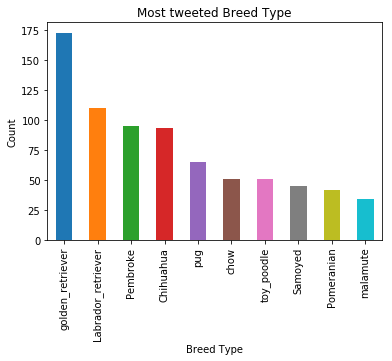

In [91]:
#breed_type_plot_helper = twitter_archive_master_df[twitter_archive_master_df.breed_type.value_counts()[twitter_archive_master_df.breed_type]>=20]
twitter_archive_master_df.breed_type.value_counts()[:10].plot(kind = 'bar')
plt.ylabel('Count')
plt.xlabel('Breed Type')
plt.title('Most tweeted Breed Type')
plt.show()

#### Golden Retriever is the most popular breeds among the available tweets

### Which is the most used source of tweets for WeRateDogs

In [92]:
twitter_archive_master_df.source.value_counts()

Twitter for iPhone    2019
Twitter Web Client      30
TweetDeck               10
Name: source, dtype: int64

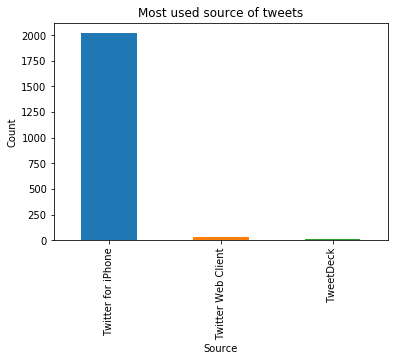

In [93]:
twitter_archive_master_df.source.value_counts().plot(kind = 'bar')
plt.ylabel('Count')
plt.xlabel('Source')
plt.title('Most used source of tweets')
plt.show()

#### Twitter for iPhone is clearly most used source of tweets almost 98% tweets comes through it

### Most tweeted Dog stages

In [94]:
twitter_archive_master_df.dog_stage.value_counts()

pupper          212
doggo            66
puppo            24
floofer           8
doggo/pupper      7
Name: dog_stage, dtype: int64

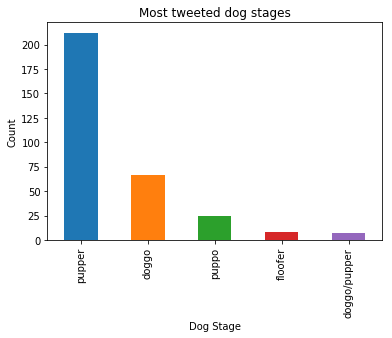

In [95]:
twitter_archive_master_df.dog_stage.value_counts().plot(kind = 'bar')
plt.ylabel('Count')
plt.xlabel('Dog Stage')
plt.title('Most tweeted dog stages')
plt.show()

#### As total no. of tweets for which dog stages is available is very low almost 15% hence we can not predict much

### How does average ratings, Prediction Confidence, Favourite counts and Retweet Counts vary among various top Breed Type

In [98]:
top_breed_type_df = twitter_archive_master_df.groupby('breed_type').filter(lambda x: len(x) >= 30)

In [99]:
top_breed_type_df.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,breed_type,prediction_confidence,favorite_count,retweet_count
0,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14.0,10.0,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,29792,6663
2,872967104147763200,2017-06-09 00:02:31,Twitter for iPhone,Here's a very large dog. He has a date later. Politely asked this water person to check if his breath is bad. 12/10 good to go doggo https://t.co/EMYIdoblMR,"https://twitter.com/dog_rates/status/872967104147763200/photo/1,https://twitter.com/dog_rates/status/872967104147763200/photo/1",12.0,10.0,None,doggo,https://pbs.twimg.com/media/DB1m871XUAAw5vZ.jpg,2,Labrador_retriever,0.476913,25617,4976
4,869596645499047938,2017-05-30 16:49:31,Twitter for iPhone,This is Scout. He just graduated. Officially a doggo now. Have fun with taxes and losing sight of your ambitions. 12/10 would throw cap for https://t.co/DsA2hwXAJo,"https://twitter.com/dog_rates/status/869596645499047938/photo/1,https://twitter.com/dog_rates/status/869596645499047938/photo/1",12.0,10.0,Scout,doggo,https://pbs.twimg.com/media/DBFtiYqWAAAsjj1.jpg,1,Chihuahua,0.955156,15085,2894
5,858843525470990336,2017-05-01 00:40:27,Twitter for iPhone,I have stumbled puppon a doggo painting party. They're looking to be the next Pupcasso or Puppollock. All 13/10 would put it on the fridge https://t.co/cUeDMlHJbq,https://twitter.com/dog_rates/status/858843525470990336/photo/1,13.0,10.0,None,doggo,https://pbs.twimg.com/media/C-s5oYZXkAAMHHq.jpg,1,golden_retriever,0.578120,14987,3309
6,846514051647705089,2017-03-28 00:07:32,Twitter for iPhone,This is Barney. He's an elder doggo. Hitches a ride when he gets tired. Waves goodbye before he leaves. 13/10 please come back soon https://t.co/cFAasDXauK,"https://twitter.com/dog_rates/status/846514051647705089/photo/1,https://twitter.com/dog_rates/status/846514051647705089/photo/1,https://twitter.com/dog_rates/status/846514051647705089/photo/1",13.0,10.0,Barney,doggo,https://pbs.twimg.com/media/C79sB4xXwAEvwKY.jpg,2,golden_retriever,0.650003,44056,11366


In [100]:
top_breed_type_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 853 entries, 0 to 2051
Data columns (total 15 columns):
tweet_id                 853 non-null int64
timestamp                853 non-null datetime64[ns]
source                   853 non-null object
text                     853 non-null object
expanded_urls            853 non-null object
rating_numerator         853 non-null float64
rating_denominator       853 non-null float64
name                     817 non-null object
dog_stage                134 non-null object
jpg_url                  853 non-null object
img_num                  853 non-null int64
breed_type               853 non-null object
prediction_confidence    853 non-null float64
favorite_count           853 non-null int64
retweet_count            853 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(4), object(7)
memory usage: 106.6+ KB


In [100]:
breed_type_vis_helper = top_breed_type_df.groupby('breed_type')['rating_numerator','rating_denominator','prediction_confidence','favorite_count','retweet_count'].mean()
breed_type_vis_helper

,rating_numerator,rating_denominator,prediction_confidence,favorite_count,retweet_count
breed_type,,,,,
Chesapeake_Bay_retriever,10.838710,10.000000,0.429673,9177.903226,2374.451613
Chihuahua,10.591398,10.000000,0.522124,7718.838710,2682.440860
French_bulldog,11.166667,10.000000,0.664626,18706.333333,4795.966667
Labrador_retriever,13.572727,12.181818,0.589989,10238.963636,3451.745455
Pembroke,11.410526,10.000000,0.675733,10178.557895,2714.442105
Pomeranian,10.922619,10.000000,0.686306,7042.095238,2383.190476
Samoyed,11.755556,10.000000,0.695987,11436.244444,4635.244444
chow,14.039216,12.156863,0.518197,8171.313725,2531.000000
cocker_spaniel,11.424242,10.000000,0.487016,11442.696970,4520.000000


In [101]:
breed_type_vis_helper['avg_rating'] = breed_type_vis_helper['rating_numerator']/breed_type_vis_helper['rating_denominator']
breed_type_vis_helper

,rating_numerator,rating_denominator,prediction_confidence,favorite_count,retweet_count,avg_rating
breed_type,,,,,,
Chesapeake_Bay_retriever,10.838710,10.000000,0.429673,9177.903226,2374.451613,1.083871
Chihuahua,10.591398,10.000000,0.522124,7718.838710,2682.440860,1.059140
French_bulldog,11.166667,10.000000,0.664626,18706.333333,4795.966667,1.116667
Labrador_retriever,13.572727,12.181818,0.589989,10238.963636,3451.745455,1.114179
Pembroke,11.410526,10.000000,0.675733,10178.557895,2714.442105,1.141053
Pomeranian,10.922619,10.000000,0.686306,7042.095238,2383.190476,1.092262
Samoyed,11.755556,10.000000,0.695987,11436.244444,4635.244444,1.175556
chow,14.039216,12.156863,0.518197,8171.313725,2531.000000,1.154839
cocker_spaniel,11.424242,10.000000,0.487016,11442.696970,4520.000000,1.142424


In [102]:
breed_type_vis_helper['avg_rating'].sort_values( ascending = False)

breed_type
Samoyed                     1.175556
golden_retriever            1.165283
chow                        1.154839
cocker_spaniel              1.142424
Pembroke                    1.141053
French_bulldog              1.116667
Labrador_retriever          1.114179
toy_poodle                  1.103922
Pomeranian                  1.092262
malamute                    1.088235
Chesapeake_Bay_retriever    1.083871
Chihuahua                   1.059140
pug                         1.030769
Name: avg_rating, dtype: float64

In [103]:
breed_type_vis_helper['prediction_confidence'].sort_values( ascending = False)

breed_type
Samoyed                     0.695987
Pomeranian                  0.686306
Pembroke                    0.675733
pug                         0.670693
French_bulldog              0.664626
golden_retriever            0.642582
Labrador_retriever          0.589989
malamute                    0.536383
Chihuahua                   0.522124
chow                        0.518197
cocker_spaniel              0.487016
toy_poodle                  0.470654
Chesapeake_Bay_retriever    0.429673
Name: prediction_confidence, dtype: float64

In [104]:
breed_type_vis_helper['favorite_count'].sort_values( ascending = False)

breed_type
French_bulldog              18706.333333
cocker_spaniel              11442.696970
Samoyed                     11436.244444
golden_retriever            10408.104046
Labrador_retriever          10238.963636
Pembroke                    10178.557895
malamute                     9587.500000
Chesapeake_Bay_retriever     9177.903226
chow                         8171.313725
Chihuahua                    7718.838710
Pomeranian                   7042.095238
toy_poodle                   5801.313725
pug                          5363.369231
Name: favorite_count, dtype: float64

In [105]:
breed_type_vis_helper['retweet_count'].sort_values( ascending = False)

breed_type
French_bulldog              4795.966667
Samoyed                     4635.244444
cocker_spaniel              4520.000000
golden_retriever            3592.658960
Labrador_retriever          3451.745455
malamute                    2961.323529
Pembroke                    2714.442105
Chihuahua                   2682.440860
chow                        2531.000000
Pomeranian                  2383.190476
Chesapeake_Bay_retriever    2374.451613
toy_poodle                  1969.117647
pug                         1768.753846
Name: retweet_count, dtype: float64

#### Samoyed has the best average rating of 1.176 out of 1 and Golden Retriever is second with average rating of 1.165 out of 1

#### Samoyed has best average Prediction Confidence of 0.696

#### French Bulldog has a very high average favourite count compared to other breeds

#### French Bulldog has best average retweet count of 4795.967 and is close second with average retweet count of 4635.244